In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re

In [2]:
#Read the data from the csv files loaded 
sarcasm_bullying_data  = pd.read_csv(r'./dataset/sarcastic_data.csv')
non_sarcasm_bullying_data  = pd.read_csv(r'./dataset/non-sarcastic_data.csv')

In [3]:
#Convert the loaded dataset into list
complete_sarcastic_list = sarcasm_bullying_data.values.tolist()
complete_non_sarcastic_list = non_sarcasm_bullying_data.values.tolist()

#Merge non sarcastic list in sarcastic list
complete_sarcastic_list.extend(complete_non_sarcastic_list)

#shuffling the dataset
for i in range(0,120):
    random.shuffle(complete_sarcastic_list)

#Creatng a complete set of data
complete_set = complete_sarcastic_list

#Separating sentences and labels into two different list
complete_comments = []
labels = []

for each in complete_set:
    complete_comments.append(each[0])
    labels.append(each[1])


In [4]:
complete_comments =  [x.lower() for x in complete_comments]
complete_comments = [re.sub(r'\[^a-zA-z0-9\s]',"",i) for i in complete_comments]

In [5]:
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(complete_comments)
X = tokenizer.texts_to_sequences(complete_comments)
X = pad_sequences(X)
X.shape
word_index = tokenizer.word_index

In [6]:
Y = pd.get_dummies(labels)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [7]:
embed_dim = 2
lstm_out = 2

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 76, 2)             6000      
_________________________________________________________________
lstm (LSTM)                  (None, 2)                 40        
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
Total params: 6,046
Trainable params: 6,046
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, Y_train, epochs = 12,validation_data = (X_test,Y_test), verbose = 1)

Epoch 1/12
20/20 [==============================] - 1s 42ms/step - loss: 0.6928 - accuracy: 0.5403 - val_loss: 0.6921 - val_accuracy: 0.6128
Epoch 2/12
20/20 [==============================] - 0s 23ms/step - loss: 0.6906 - accuracy: 0.5548 - val_loss: 0.6903 - val_accuracy: 0.5226
Epoch 3/12
20/20 [==============================] - 0s 23ms/step - loss: 0.6872 - accuracy: 0.5258 - val_loss: 0.6872 - val_accuracy: 0.5226
Epoch 4/12
20/20 [==============================] - 0s 23ms/step - loss: 0.6816 - accuracy: 0.5258 - val_loss: 0.6821 - val_accuracy: 0.5226
Epoch 5/12
20/20 [==============================] - 0s 23ms/step - loss: 0.6719 - accuracy: 0.5274 - val_loss: 0.6725 - val_accuracy: 0.5226
Epoch 6/12
20/20 [==============================] - 0s 22ms/step - loss: 0.6555 - accuracy: 0.5339 - val_loss: 0.6572 - val_accuracy: 0.5226
Epoch 7/12
20/20 [==============================] - 0s 22ms/step - loss: 0.6308 - accuracy: 0.6161 - val_loss: 0.6357 - val_accuracy: 0.5940
Epoch 8/12
20

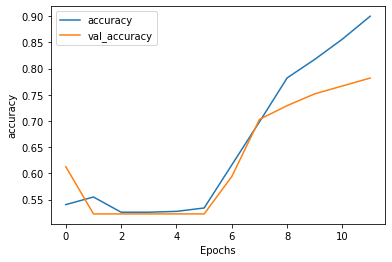

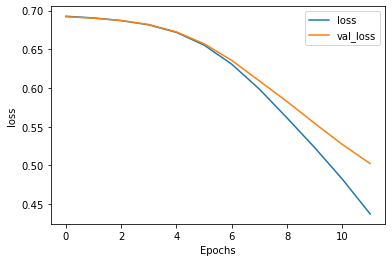

In [10]:
#Plotting the graphs
def plot_graphs(history,string):
    labels = [string,"val_"+string]
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend(labels)
    plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")